<a href="https://colab.research.google.com/github/AsifArkadia/repoUAS_ML_Asif/blob/main/naive_bayes_prediksi_stasiun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Tujuan Perjalanan Kereta Api dengan Naive Bayes

## 1. Import Library

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Load Dataset

In [4]:
df = pd.read_csv('daop1_fix.csv')
df = df[['stasiun_awal', 'stasiun_akhir']]
df.dropna(inplace=True)
df.head()


/tmp/ipython-input-4-2414156449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,stasiun_awal,stasiun_akhir
0,Stasiun Jakarta Kota,Stasiun Tegal
1,Stasiun Tanjung Priok,Stasiun Cikampek
2,Stasiun Tanjung Priok,Stasiun Purwakarta
3,Stasiun Tanahabang,Stasiun Rangkasbitung
4,Stasiun Tanahabang,Stasiun Rangkasbitung


## 3. Preprocessing (Encoding Kolom Teks)

In [5]:
le_awal = LabelEncoder()
le_akhir = LabelEncoder()

X = le_awal.fit_transform(df['stasiun_awal'])
y = le_akhir.fit_transform(df['stasiun_akhir'])

X = X.reshape(-1, 1)  # Reshape untuk sklearn


## 4. Split Data (Train & Test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Latih Model Naive Bayes

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## 6. Evaluasi Model

In [8]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       0.33      1.00      0.50         3
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.33         9
   macro avg       0.07      0.20      0.10         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 7. Confusion Matrix

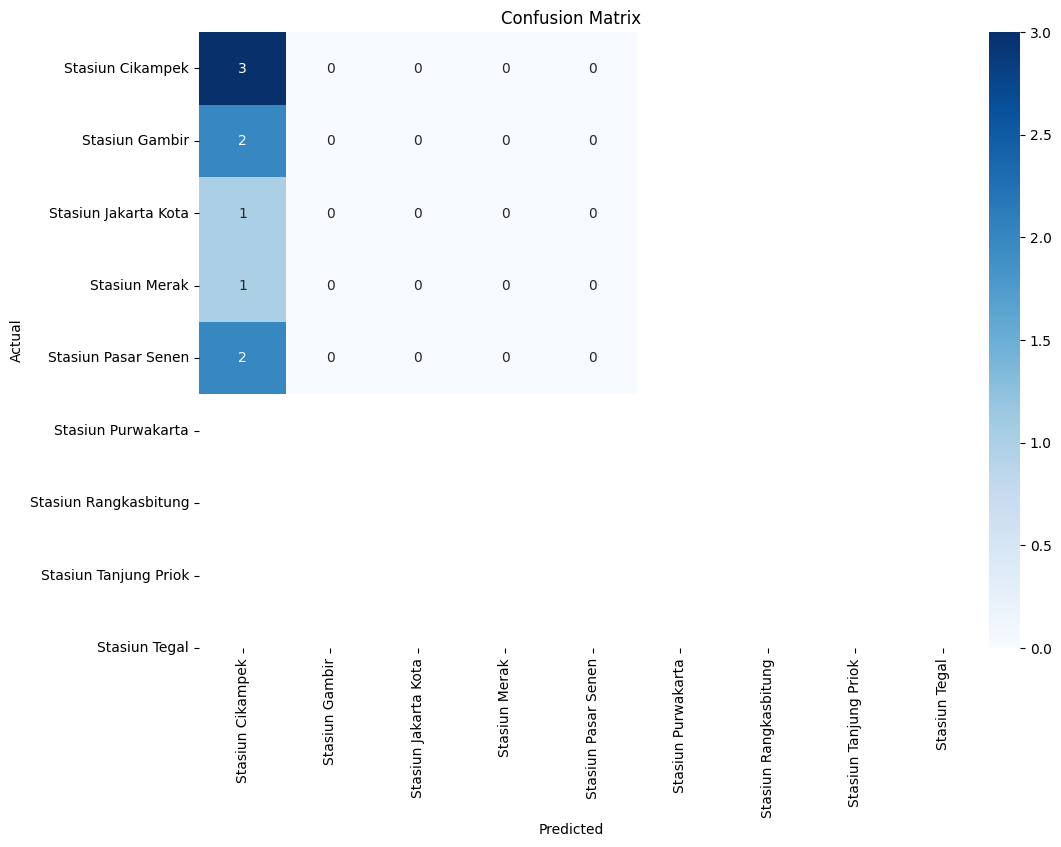

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_akhir.classes_, yticklabels=le_akhir.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
